In [1]:
import numpy as np  
import pandas as pd   
import matplotlib.pyplot as plt  
from scipy.stats import norm
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [2]:
ticker = input("enter the ticker of the stock: ")

enter the ticker of the stock: TSLA


In [3]:
finviz_url ='https://finviz.com/quote.ashx?t='

In [4]:
tickers = [ticker]

In [5]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [6]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        print(title)
        date_data = row.td.text.split(' ')
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

Dow Jones Futures: Market Rally Survives Wild Week, Bitcoin Tumbles Sunday; Follow Google, Nvidia, Tesla
Bitcoin continues downward spiral after volatile week that crashed crypto market
Ditch Dogecoin: These Stocks Are Infinitely Better Buys
Market Recap With Jim Cramer: Buy GE, Ralph Lauren, Cisco, Tesla
Elon Musk Takes Crypto's Side In 'Battle' With Fiat Money
Elon Musk says he supports crypto over fiat currency in reaction to Bitcoin backlash
Tesla Accused Of Firing Employee To Cover Up Copper Theft
Musk says he supports crypto in battle with fiat money
Musk says he supports crypto in battle with fiat money
10 Best Stocks to Buy in 2021 According to Cathie Wood
Apple overtakes Amazon to become worlds most valuable brand, while Tesla is the fastest-growing
Tesla Kickstarted the Electric Vehicle Market: How These 3 Car Stocks Are Helping Build Its Future
Israel and Hamas begin cease-fire in Gaza conflict
Stock Market Rally Erases Losses, But Hits Resistance; AT&T Merger, Ford F-150 Li

In [7]:
df

,ticker,date,time,title
0,TSLA,May-23-21,09:34AM,Dow Jones Futures: Market Rally Survives Wild ...
1,TSLA,May-23-21,07:19AM,Bitcoin continues downward spiral after volati...
2,TSLA,May-23-21,06:06AM,Ditch Dogecoin: These Stocks Are Infinitely Be...
3,TSLA,May-23-21,04:00AM,"Market Recap With Jim Cramer: Buy GE, Ralph La..."
4,TSLA,May-22-21,01:26PM,Elon Musk Takes Crypto's Side In 'Battle' With...
...,...,...,...,...
95,TSLA,May-19-21,03:55PM,Cryptocrash trends on Twitter as plunge in bit...
96,TSLA,May-19-21,03:37PM,Elon Musks carbon comments will be changing po...
97,TSLA,May-19-21,03:11PM,Bitcoin Marches Away From Crypto Pack in Show ...
98,TSLA,May-19-21,02:39PM,Bearish Option Trade On Tesla Stock Could Yiel...


In [8]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

<Figure size 720x432 with 0 Axes>

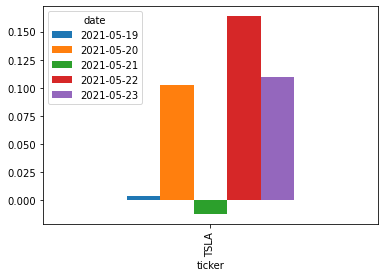

In [9]:
plt.figure(figsize=(10,6))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

In [10]:
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df

compound
ticker date                
TSLA   2021-05-19  0.003687
       2021-05-20  0.102474
       2021-05-21 -0.012108
       2021-05-22  0.163638
       2021-05-23  0.110100